In [1]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 8.9MB/s 
     |████████████████████████████████| 81kB 6.4MB/s 
     |████████████████████████████████| 1.1MB 13.3MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 3.2MB 36.7MB/s 
     |████████████████████████████████| 296kB 34.6MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=882234e5d5465eebcbf5d130091271d5428b52da5522fadf57f1fe220e6017bc
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=2e50fd03a122a22498c23f914f07a9af5e7babed3f94dc65e24ce12dcc7d9979
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
Successfully built htmlmin phik
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing in

# Chapter 2 - Ex2: Iris - Multiple Linear Regression
Cho dữ liệu Iris.xls
Yêu cầu: Thực hiện linenear regression để từ sepallength, sepalwidth,
petallength => dự đoán petalwidth
1. Đọc dữ liệu, trực quan hóa dữ liệu.
2. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được là sepallength, sepalwidth, petallength
(inputs) và petalwidth (outputs) với tỷ lệ dữ liệu test là 0.2
3. Áp dụng linrear regression
4. Vẽ hình. Nhận xét kết quả
5. Nếu sepallength, sepalwidth, petallength là 4.5, 3.1, 1.6 => petalwidth là bao nhiêu?
6. Áp dụng lựa chọn thuộc tính quan trọng cho model. Xây dựng lại model sau khi lựa chọn các
thuộc tính quan trọng.

In [2]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

%cd '/content/gdrive/MyDrive/LDS6_S7CN_KieuTriDang/BaiTapMachinLearning/Chapter2_Linear_Regression'

Mounted at /content/gdrive/
/content/gdrive/MyDrive/LDS6_S7CN_KieuTriDang/BaiTapMachinLearning/Chapter2_Linear_Regression


In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
iris = pd.read_excel('./Iris.xls')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

def multiple_linear(X, y, test_size):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
  reg = LinearRegression()
  reg.fit(X_train, y_train)
  y_pred = reg.predict(X_test)
  y_train_pred = reg.predict(X_train)
  train_score = reg.score(X_train, y_train)
  test_score = reg.score(X_test, y_test)
  variance_score = reg.score(X, y)

  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)

  plt.figure(figsize=(10,5))
  plt.subplot(1, 2, 1)
  ax1 = sns.distplot(y_train, hist=False, color="b", label='Train Actual')
  sns.distplot(y_train_pred, hist=False, color="r", label='Train Predict', ax=ax1)
  plt.subplot(1,2,2)
  ax2 = sns.distplot(y_test, hist=False, color="b", label='Test Actual')
  sns.distplot(y_pred, hist=False, color="r", label='Test Predict', ax=ax2)
  plt.show()

  print('Cofficient: ', reg.coef_)
  print('Intercept: ', reg.intercept_)
  print('Mean Square Error: ', mse)
  print('Mean Absolute Error: ', mae)
  print('Variance Score: ', variance_score)
  print('Train Score: ', train_score)
  print('Test score: ', test_score)

  return reg

In [28]:
X = iris[['sepallength', 'sepalwidth', 'petallength']]
y = iris['petalwidth']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

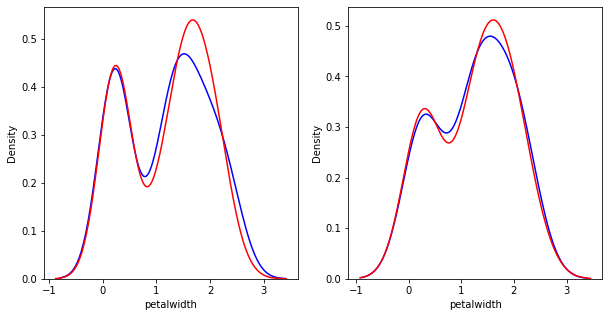

Cofficient:  [-0.20318335  0.24475654  0.52643361]
Intercept:  -0.3418343976238869
Mean Square Error:  0.026256836575709444
Mean Absolute Error:  0.12895119416697773
Variance Score:  0.9379121938663376
Train Score:  0.9357897442119615
Test score:  0.9477371883445274


In [31]:
reg = multiple_linear(X, y, 0.2)

In [14]:
new_iris = [[4.5, 3.1, 1.6]]
new_iris_petalwidth = reg.predict(new_iris)
new_iris_petalwidth

array([0.35736941])

### Chọn thuộc tính quan trọng

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [42]:
select_best_features = SelectKBest(score_func = f_regression, k='all')
best_features = select_best_features.fit(X, y)
print('best_features.scores_', best_features.scores_)
print('features', X.columns)

best_features.scores_ [ 299.1949571    21.55437779 1876.65781288]
features Index(['sepallength', 'sepalwidth', 'petallength'], dtype='object')


In [44]:
X_new = X[['sepallength', 'petallength']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

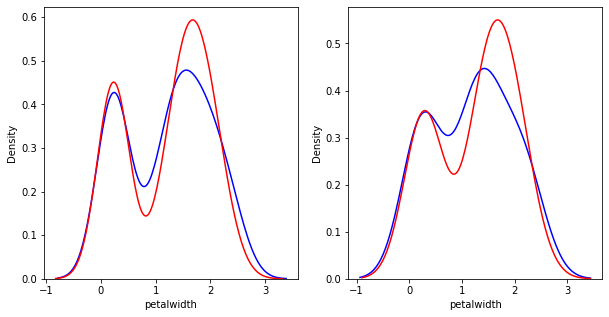

Cofficient:  [-0.11396049  0.46414079]
Intercept:  0.1312383717558998
Mean Square Error:  0.05368820040503442
Mean Absolute Error:  0.1774524976609067
Variance Score:  0.9282831601707447
Train Score:  0.934575825782101
Test score:  0.9009056820726995


In [45]:
reg = multiple_linear(X_new, y, 0.2)